## Task 3: Customer Segmentation / Clustering
Perform customer segmentation using clustering techniques

In [2]:
from sklearn.decomposition import PCA

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [5]:
transactions_products = transactions.merge(products, on="ProductID", how="left")
customer_transactions = transactions_products.merge(customers, on="CustomerID", how="left")

In [6]:
print((transactions_products).head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  


In [7]:
print((customer_transactions).head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [8]:
customer_features = customer_transactions.groupby("CustomerID").agg(
    total_spend=pd.NamedAgg(column="TotalValue", aggfunc="sum"),
    transaction_count=pd.NamedAgg(column="TransactionID", aggfunc="count"),
    avg_transaction_value=pd.NamedAgg(column="TotalValue", aggfunc="mean"),
    region=pd.NamedAgg(column="Region", aggfunc="first")
).reset_index()

In [9]:
customer_features = pd.get_dummies(customer_features, columns=["region"], prefix="region")

In [10]:
scaler = StandardScaler()
numerical_features = ["total_spend", "transaction_count", "avg_transaction_value"]
normalized_features = scaler.fit_transform(customer_features[numerical_features])

In [11]:
X = pd.concat(
    [pd.DataFrame(normalized_features, columns=numerical_features), 
     customer_features.filter(like="region_").reset_index(drop=True)], 
    axis=1
)

In [12]:
cluster_range = range(2, 11)
db_indices = []
silhouette_scores = []

In [13]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    db_indices.append(davies_bouldin_score(X, cluster_labels))
    silhouette_scores.append(silhouette_score(X, cluster_labels))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

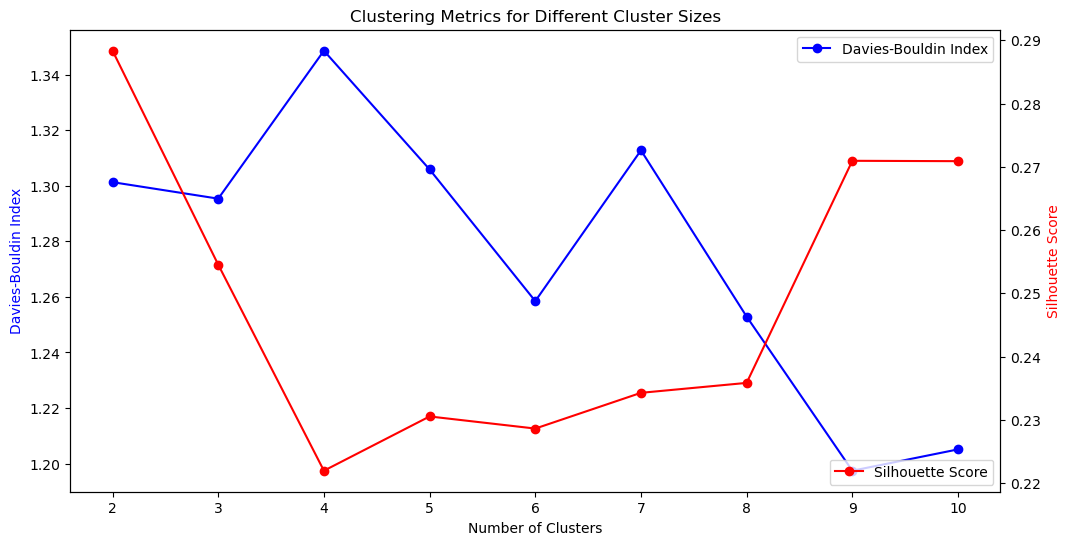

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(cluster_range, db_indices, 'b-o', label="Davies-Bouldin Index")
ax2.plot(cluster_range, silhouette_scores, 'r-o', label="Silhouette Score")

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Davies-Bouldin Index", color='b')
ax2.set_ylabel("Silhouette Score", color='r')
ax1.set_title("Clustering Metrics for Different Cluster Sizes")
ax1.legend(loc="upper right")
ax2.legend(loc="lower right")
plt.show()

In [15]:
optimal_k = 9
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['Cluster'] = final_kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


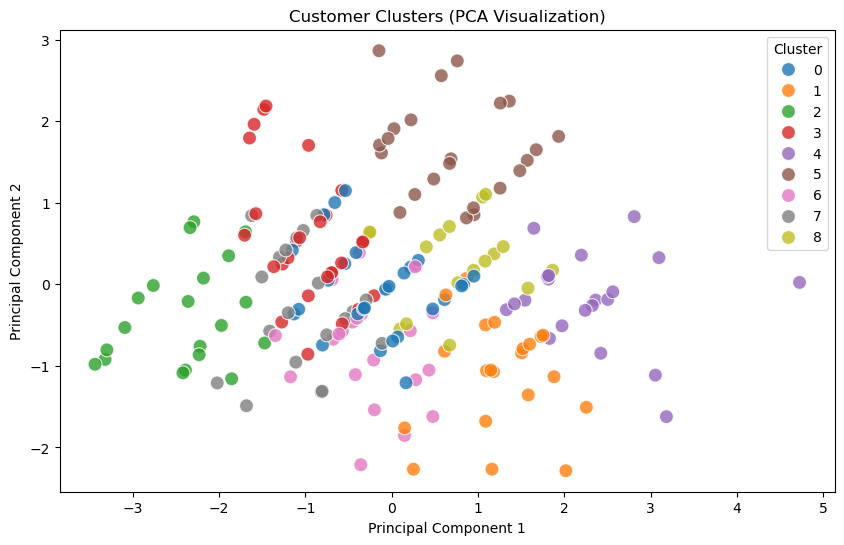

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_features['Cluster'], palette="tab10", s=100, alpha=0.8)
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [17]:
cluster_summary = customer_features.groupby("Cluster").agg(
    avg_total_spend=("total_spend", "mean"),
    avg_transaction_count=("transaction_count", "mean"),
    avg_transaction_value=("avg_transaction_value", "mean"),

).reset_index()

print(cluster_summary)

   Cluster  avg_total_spend  avg_transaction_count  avg_transaction_value
0        0      3194.994286               4.892857             660.281179
1        1      4901.490000               8.190476             608.763169
2        2       747.925000               2.100000             354.818167
3        3      2106.690741               3.185185             708.864444
4        4      6731.362381               7.904762             855.443967
5        5      4272.603043               3.956522            1089.966783
6        6      3036.014545               5.727273             545.043406
7        7      2117.109000               4.200000             528.543233
8        8      4529.547059               5.647059             807.380850
